# EDA

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
# matplotlib.use('Agg')
import datetime
import sys

sys.path.append("../..")

%matplotlib inline

In [2]:
processed_d10_add_tech = pd.read_csv("../../dataset/daily-level/crypto_TI_t10_2023-04-01.csv")
processed_h10_add_tech = pd.read_csv("../../dataset/hour-level/crypto_TI_t10_2023-04-01.csv")


In [3]:
processed_d10_add_tech.tic.unique()

array(['ADAUSDT', 'BNBUSDT', 'BTCUSDT', 'DOGEUSDT', 'ETCUSDT', 'ETHUSDT',
       'LTCUSDT', 'SOLUSDT', 'TRXUSDT', 'XRPUSDT'], dtype=object)

In [4]:
processed_d10_add_tech.columns

Index(['timestamp', 'open', 'high', 'low', 'volume', 'tic', 'close', 'macd',
       'boll_ub', 'boll_lb', 'atr', 'rsi', 'close_7_sma', 'close_30_ema',
       'close_365_ema', 'log-ret'],
      dtype='object')

## daily interval + 10 most noticeable tics 

In [5]:
dt10summary = processed_d10_add_tech.pivot_table(index="timestamp", columns="tic", values="close")

In [6]:
dt10summary

tic         ADAUSDT   BNBUSDT   BTCUSDT  DOGEUSDT  ETCUSDT  ETHUSDT  LTCUSDT  \
timestamp                                                                      
2021-01-02  0.17509   37.7762  29331.69  0.005680   5.6938   728.91   126.24   
2021-01-03  0.17742   38.2331  32178.33  0.010526   5.7763   774.56   136.96   
2021-01-04  0.20615   41.2575  33000.05  0.009821   6.5678   978.28   161.24   
2021-01-05  0.22528   41.1333  31988.71  0.009761   7.0374  1041.43   155.34   
2021-01-06  0.25873   41.8219  33949.53  0.009970   7.2710  1099.56   158.43   
...             ...       ...       ...       ...      ...      ...      ...   
2023-03-29  0.36810  313.2000  27261.07  0.073810  20.1600  1772.99    89.13   
2023-03-30  0.38110  313.7000  28348.60  0.075570  20.6700  1793.07    91.31   
2023-03-31  0.37610  316.4000  28028.53  0.074220  20.2800  1793.61    89.06   
2023-04-01  0.39890  316.9000  28465.36  0.076950  20.7400  1821.52    89.57   
2023-04-02  0.39190  314.9000  28452.73  0.081810  21.2400  1820.79    92.57   

tic         SOLUSDT  TRXUSDT  XRPUSDT  
timestamp                              
2021-01-02   1.8421  0.02685  0.23746  
2021-01-03   1.7999  0.02721  0.22064  
2021-01-04   2.1779  0.02949  0.22540  
2021-01-05   2.4909  0.03095  0.23565  
2021-01-06   2.1636  0.02852  0.22573  
...             ...      ...      ...  
2023-03-29  20.4500  0.06418  0.51440  
2023-03-30  21.1000  0.06433  0.54250  
2023-03-31  20.5500  0.06481  0.53190  
2023-04-01  21.1600  0.06553  0.53740  
2023-04-02  21.0800  0.06648  0.50950  

[821 rows x 10 columns]

<Figure size 4500x1500 with 0 Axes>

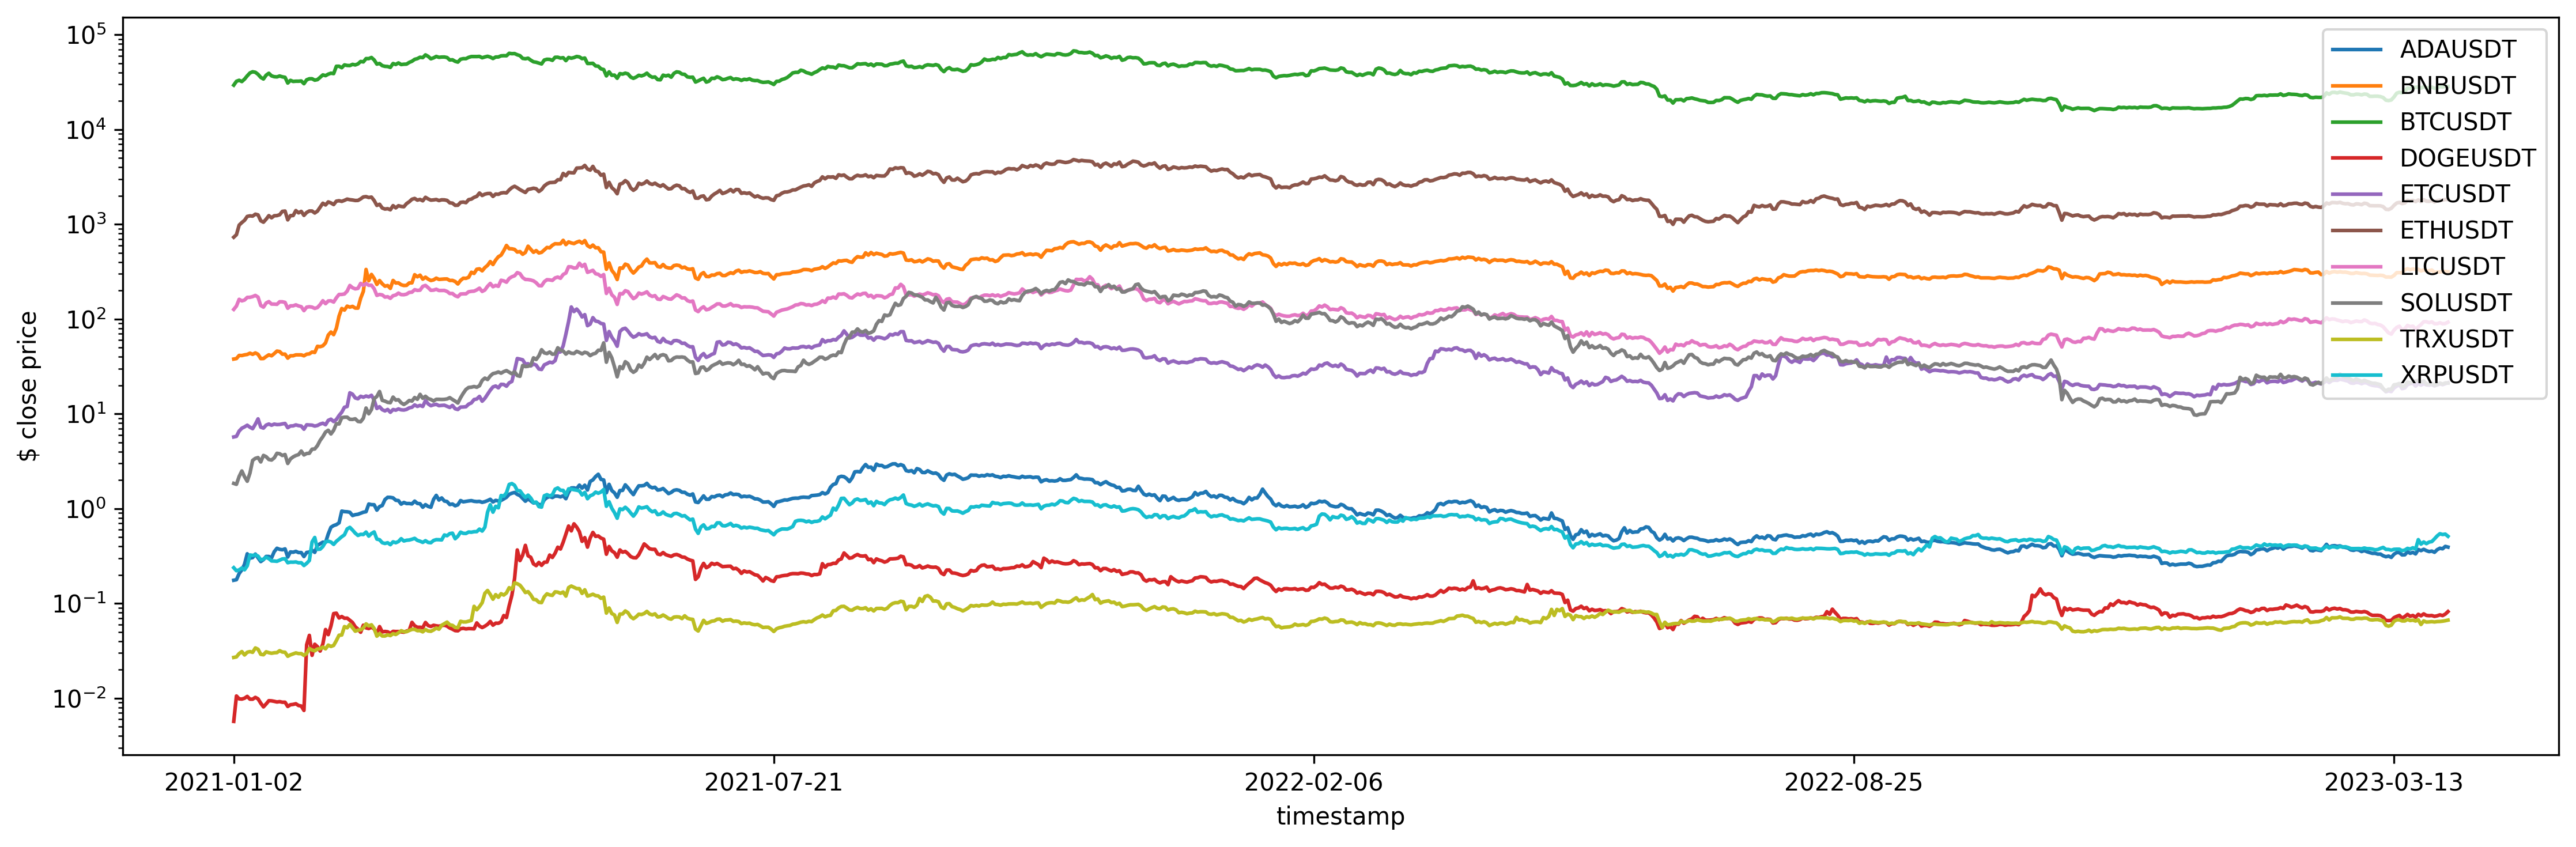

In [7]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,5)
plt.rcParams["figure.dpi"] = 300
plt.figure()

ax = dt10summary.plot()
ax.set_ylabel("$ close price")
ax.legend(loc='upper right')
plt.yscale("log")
plt.tight_layout()
plt.savefig("../../plot/fig_save/daily_raw.png", dpi=300)

In [8]:
dt10return = processed_d10_add_tech.pivot_table(index="timestamp", columns="tic", values="log-ret")

<Figure size 4500x1500 with 0 Axes>

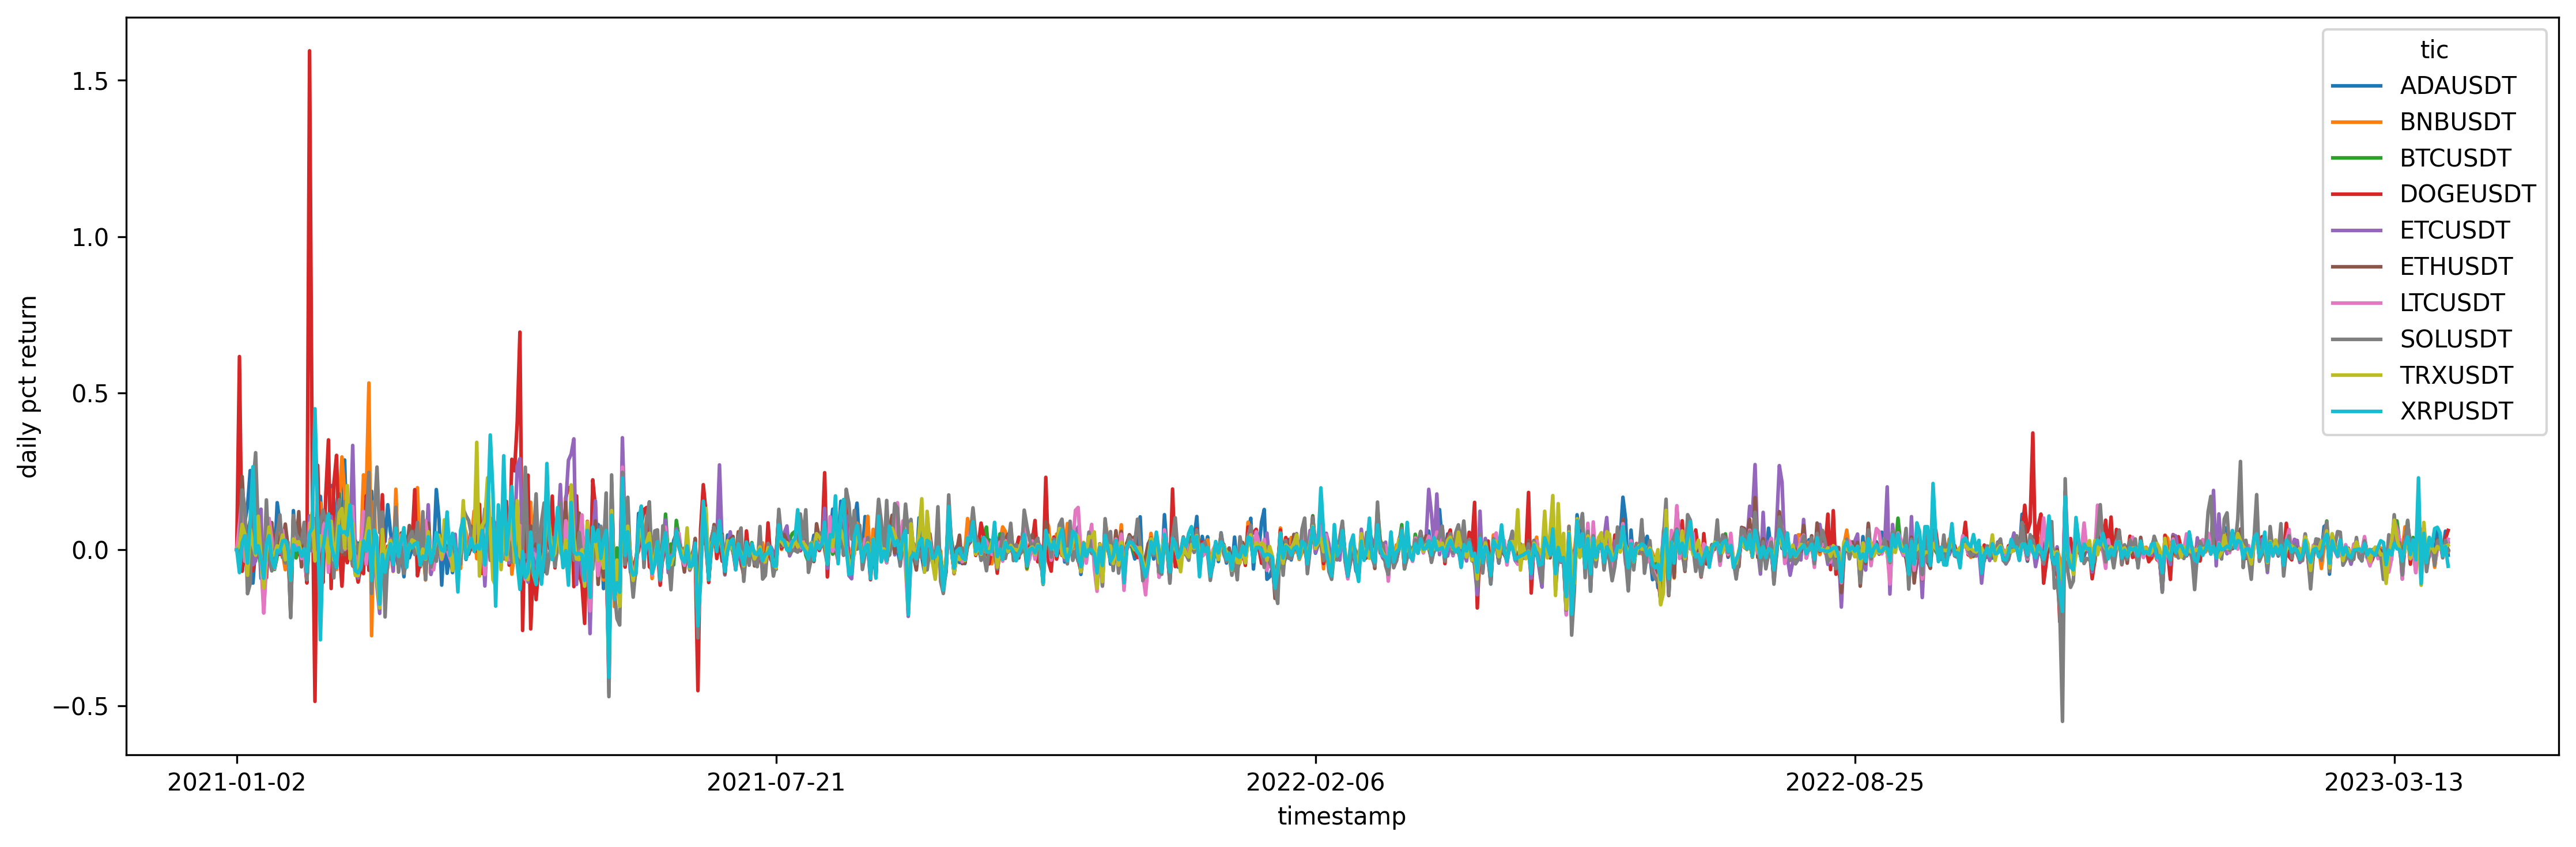

In [9]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,5)
plt.rcParams["figure.dpi"] = 300
plt.figure()

ax = dt10return.plot()
ax.set_ylabel("daily pct return")
plt.tight_layout()
plt.savefig("../../plot/fig_save/daily_log_pct_return_t10.png", dpi=300)

In [10]:
dt10return.describe()

tic       ADAUSDT     BNBUSDT     BTCUSDT    DOGEUSDT     ETCUSDT     ETHUSDT  \
count  821.000000  821.000000  821.000000  821.000000  821.000000  821.000000   
mean     0.000981    0.002583   -0.000037    0.003249    0.001604    0.001115   
std      0.057131    0.056313    0.037426    0.097460    0.067140    0.049707   
min     -0.312203   -0.416712   -0.166998   -0.485146   -0.398972   -0.324861   
25%     -0.027429   -0.019580   -0.017798   -0.032032   -0.028787   -0.022863   
50%     -0.000386    0.001337   -0.000348   -0.001516   -0.000522    0.001689   
75%      0.025925    0.023918    0.018564    0.024667    0.029123    0.028717   
max      0.286441    0.532404    0.178449    1.594144    0.357542    0.233750   

tic       LTCUSDT     SOLUSDT     TRXUSDT     XRPUSDT  
count  821.000000  821.000000  821.000000  821.000000  
mean    -0.000378    0.002969    0.001104    0.000930  
std      0.053748    0.073989    0.051147    0.061163  
min     -0.458141   -0.549008   -0.388875   -0.407796  
25%     -0.026602   -0.034617   -0.019883   -0.025459  
50%      0.000861    0.000155    0.002334    0.000757  
75%      0.027480    0.038178    0.021667    0.025668  
max      0.263514    0.309672    0.342818    0.450100

In [11]:
cum_sum = dt10return.cumsum().apply(np.exp)

<Figure size 4500x1500 with 0 Axes>

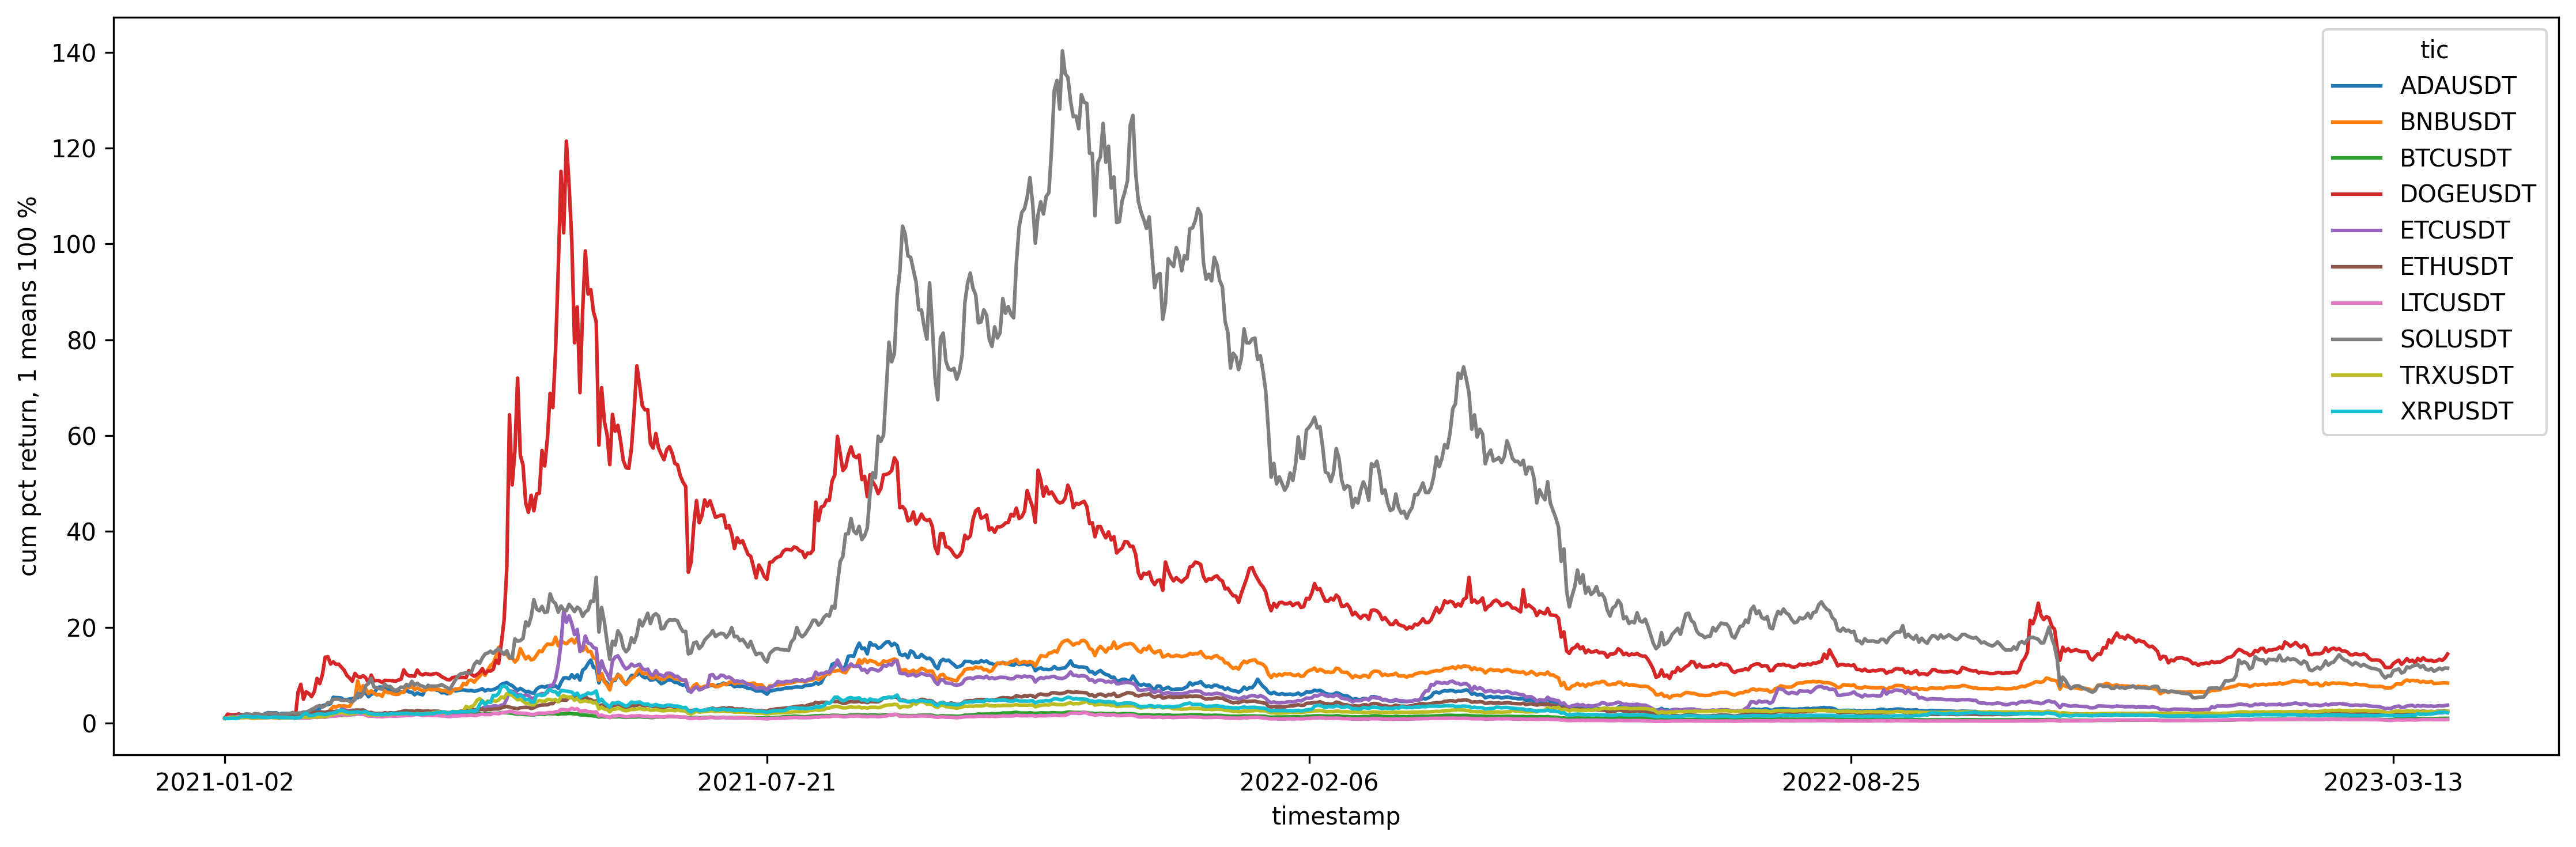

In [12]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,5)
plt.rcParams["figure.dpi"] = 300
plt.figure()

ax = cum_sum.plot()
ax.set_ylabel("cum pct return, 1 means 100 %")
plt.tight_layout()
plt.savefig("../../plot/fig_save/daily_cum_pct_return_t10.png", dpi=300)

## hour interval + 10 most noticeable tics

In [13]:
ht10summary = processed_h10_add_tech.pivot_table(index="timestamp", columns="tic", values="close")

In [14]:
ht10summary

tic                  ADAUSDT   BNBUSDT   BTCUSDT  DOGEUSDT  ETCUSDT  ETHUSDT  \
timestamp                                                                      
2021-01-01 01:00:00  0.18051   37.3764  28995.13  0.004679   5.6971   734.07   
2021-01-01 02:00:00  0.18358   37.6134  29409.99  0.004737   5.7431   748.28   
2021-01-01 03:00:00  0.18368   37.9600  29194.65  0.004755   5.7737   744.06   
2021-01-01 04:00:00  0.18292   37.9250  29278.40  0.004978   5.7431   744.82   
2021-01-01 05:00:00  0.18180   37.8702  29220.31  0.004894   5.7838   742.29   
...                      ...       ...       ...       ...      ...      ...   
2023-03-31 21:00:00  0.40270  315.5000  28391.80  0.076870  20.6900  1817.70   
2023-03-31 22:00:00  0.40450  316.6000  28477.19  0.076510  20.7100  1824.26   
2023-03-31 23:00:00  0.40130  317.0000  28570.31  0.077720  20.7900  1826.34   
2023-04-01 00:00:00  0.39890  316.9000  28465.36  0.076950  20.7400  1821.52   
2023-04-01 01:00:00  0.39520  316.9000  28438.27  0.077130  20.6800  1822.85   

tic                  LTCUSDT  SOLUSDT  TRXUSDT  XRPUSDT  
timestamp                                                
2021-01-01 01:00:00   123.87   1.5442  0.02680  0.22162  
2021-01-01 02:00:00   131.70   1.5734  0.02719  0.22382  
2021-01-01 03:00:00   133.33   1.5872  0.02728  0.22361  
2021-01-01 04:00:00   131.66   1.6029  0.02716  0.22730  
2021-01-01 05:00:00   130.87   1.6022  0.02705  0.23898  
...                      ...      ...      ...      ...  
2023-03-31 21:00:00    89.59  20.8500  0.06583  0.54440  
2023-03-31 22:00:00    89.88  21.0100  0.06589  0.54130  
2023-03-31 23:00:00    90.02  21.4000  0.06582  0.53890  
2023-04-01 00:00:00    89.57  21.1600  0.06553  0.53740  
2023-04-01 01:00:00    89.58  21.1600  0.06559  0.53320  

[19681 rows x 10 columns]

<Figure size 4500x1500 with 0 Axes>

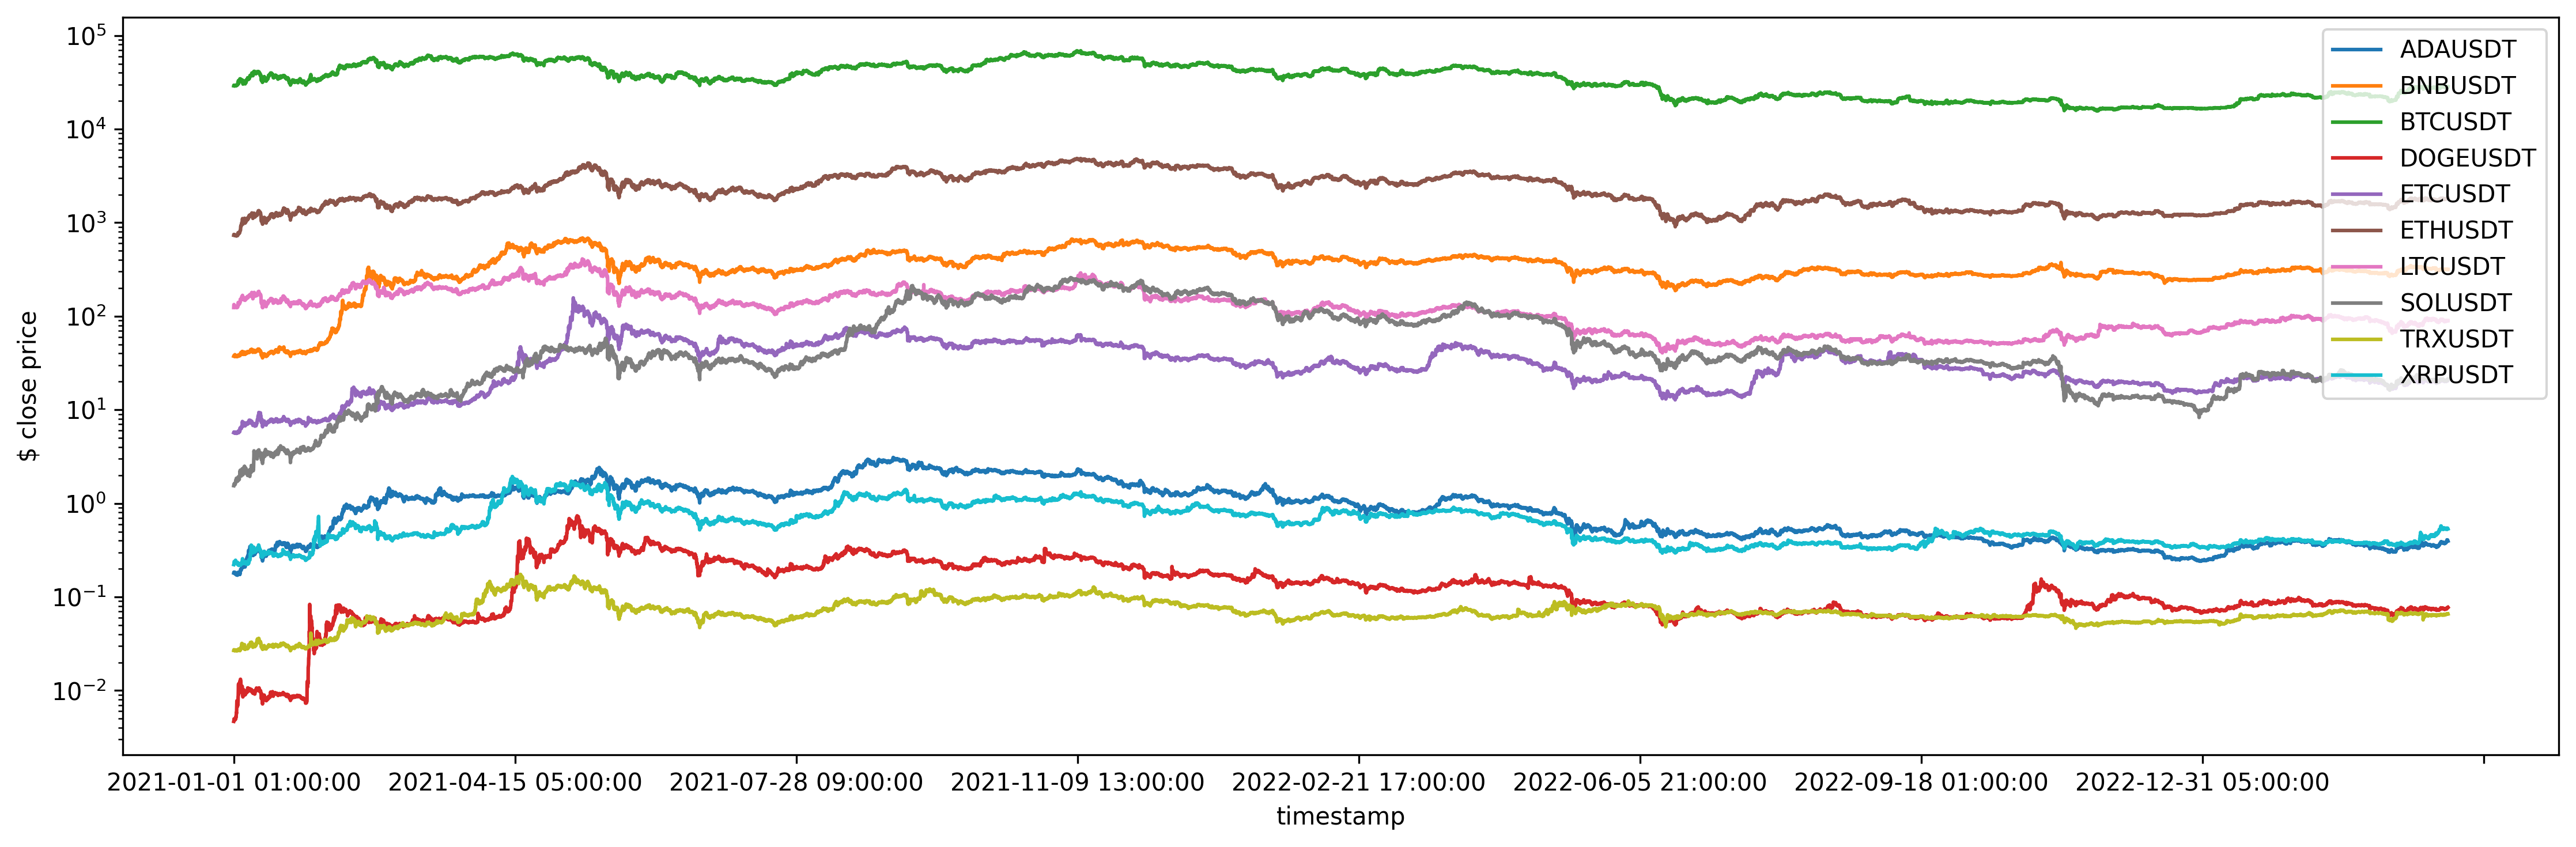

In [15]:
import matplotlib.dates as mdates
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,5)
plt.rcParams["figure.dpi"] = 300
fig = plt.figure()

ax = ht10summary.plot()
ax.set_ylabel("$ close price")
ax.legend(loc='upper right')
plt.yscale("log")
plt.tight_layout()
plt.savefig("../../plot/fig_save/hour_raw.png", dpi=300)

In [16]:
ht10return = processed_h10_add_tech.pivot_table(index="timestamp", columns="tic", values="log-ret")

<Figure size 4500x1500 with 0 Axes>

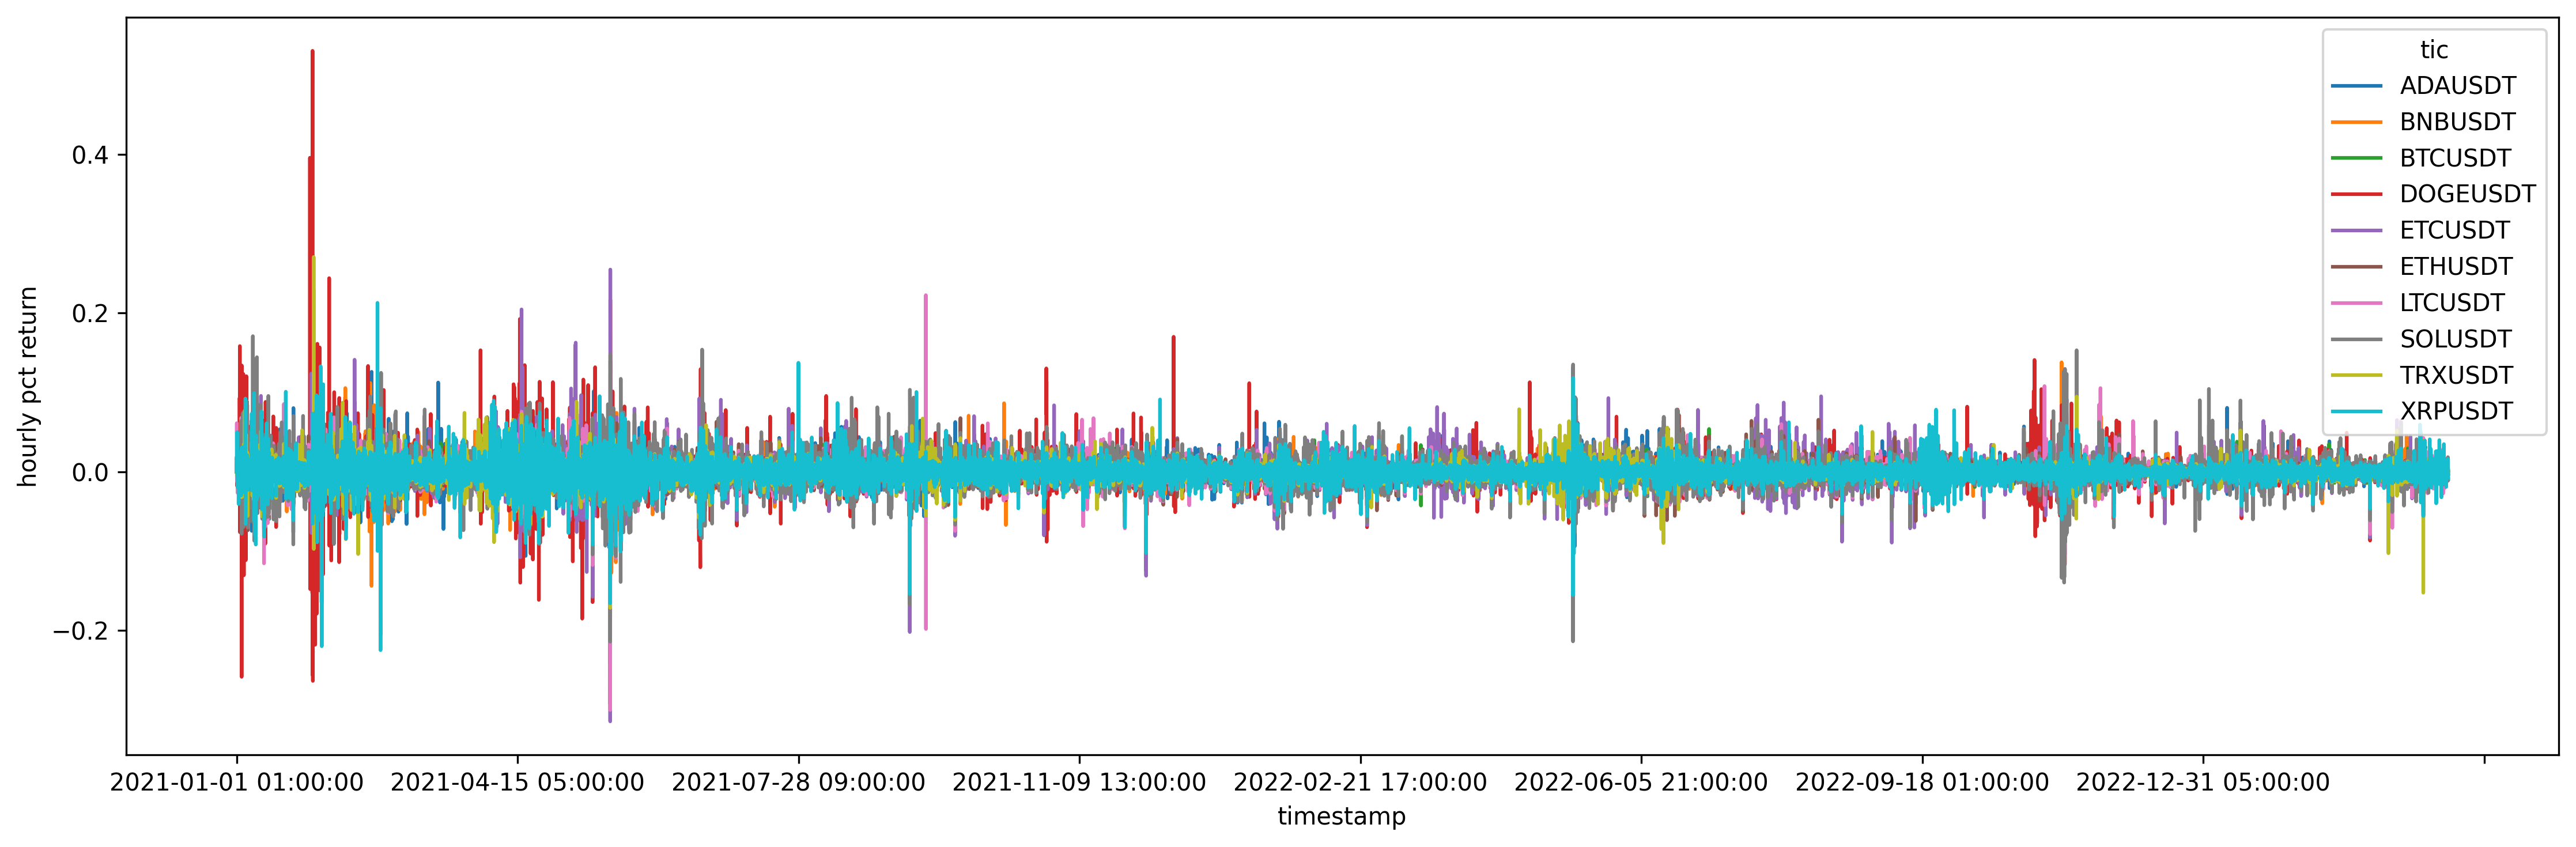

In [17]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,5)
plt.rcParams["figure.dpi"] = 300
plt.figure()

ax = ht10return.plot()
ax.set_ylabel("hourly pct return")
plt.tight_layout()
plt.savefig("../../plot/fig_save/hourly_log_pct_return_t10.png", dpi=300)

In [18]:
ht10return.describe()

tic         ADAUSDT       BNBUSDT       BTCUSDT      DOGEUSDT       ETCUSDT  \
count  19681.000000  19681.000000  1.968100e+04  19681.000000  19681.000000   
mean       0.000040      0.000109 -9.853215e-07      0.000142      0.000066   
std        0.012449      0.010888  7.868068e-03      0.018214      0.014179   
min       -0.242571     -0.168726 -9.381048e-02     -0.292911     -0.314730   
25%       -0.005216     -0.003931 -3.081015e-03     -0.005173     -0.005398   
50%        0.000000      0.000208  3.101007e-05      0.000000      0.000000   
75%        0.005163      0.004243  3.145400e-03      0.005092      0.005393   
max        0.140085      0.138032  1.161452e-01      0.530741      0.254953   

tic         ETHUSDT       LTCUSDT       SOLUSDT       TRXUSDT       XRPUSDT  
count  19681.000000  19681.000000  19681.000000  19681.000000  19681.000000  
mean       0.000046     -0.000016      0.000133      0.000045      0.000045  
std        0.010121      0.011726      0.015758      0.010609      0.012739  
min       -0.140175     -0.300400     -0.214234     -0.179880     -0.224938  
25%       -0.003932     -0.004821     -0.006699     -0.003596     -0.004627  
50%        0.000089      0.000000      0.000000      0.000286      0.000149  
75%        0.004248      0.005000      0.006617      0.003961      0.004765  
max        0.073611      0.222684      0.170977      0.270778      0.212990

In [19]:
cum_sum = ht10return.cumsum().apply(np.exp)

<Figure size 4500x1500 with 0 Axes>

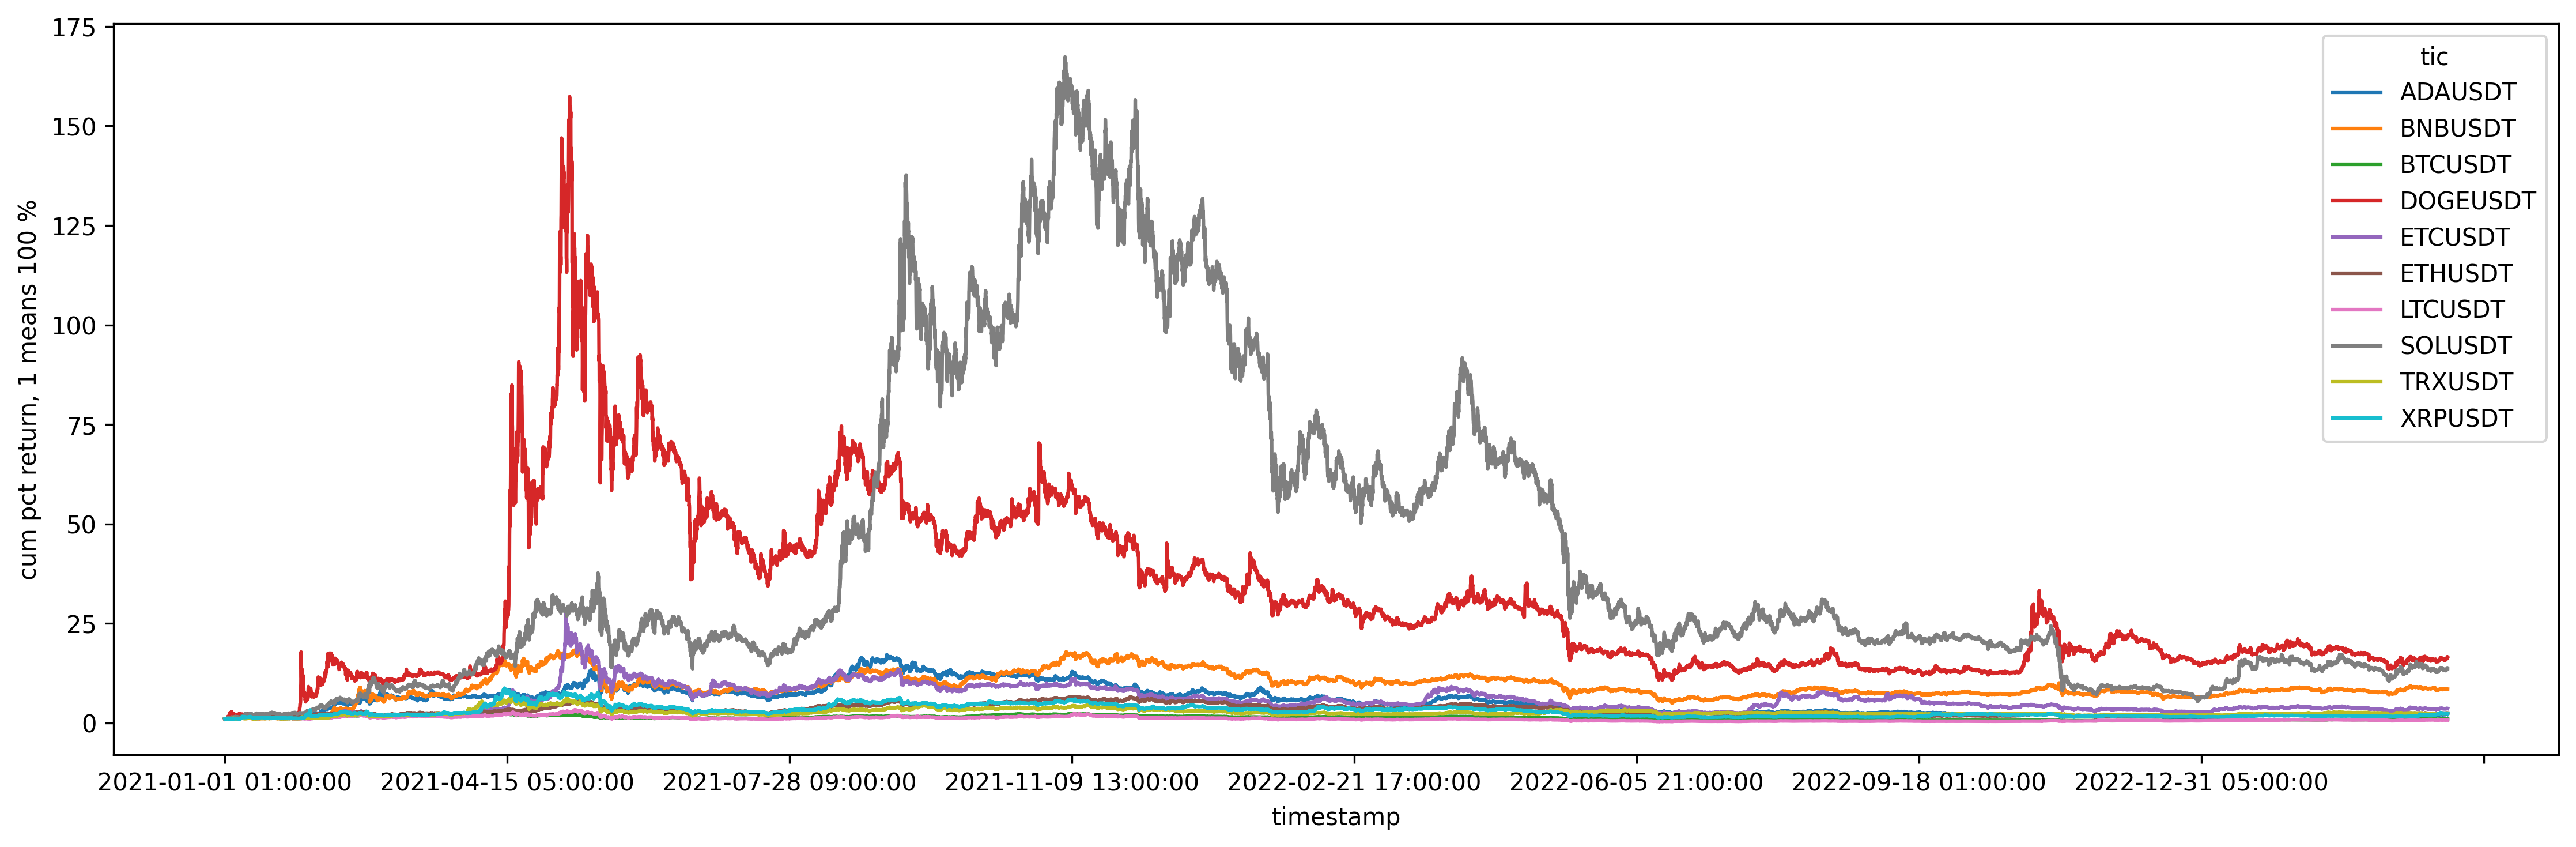

In [20]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,5)
plt.rcParams["figure.dpi"] = 300
plt.figure()

ax = cum_sum.plot()
ax.set_ylabel("cum pct return, 1 means 100 %")
plt.tight_layout()
plt.savefig("../../plot/fig_save/hourly_cum_pct_return_t10.png", dpi=300)